# Assignment 2B Design a Three-Layered ANN Classifier
Student Name: Jeremiah Snipes

Python Version: 3.13.5+

Jupyter Notebook Version: 7.3.2 or later

Date: 11/02/2025

# Install and Imports

In [61]:
# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Evaluation & Visualization
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Settings
plt.style.use("ggplot")
sns.set_theme(style="whitegrid")
np.random.seed(42)
tf.random.set_seed(42)


# Load and Explore the Data

In [6]:
# Load dataset (file is in the same folder as the notebook)
df = pd.read_csv("Churn_Modelling.csv")

#### Basic Info

In [8]:
# Preview basic info
print("Dataset Shape:", df.shape)
display(df.head())


Dataset Shape: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [35]:
# View basic dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_Germany  10000 non-null  int32  
 11  Geography_Spain    10000 non-null  int32  
dtypes: float64(2), int32(2), int64(8)
memory usage: 859.5 KB


In [37]:
# Summary statistics
display(df.describe())

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000


#### Visualize the Data

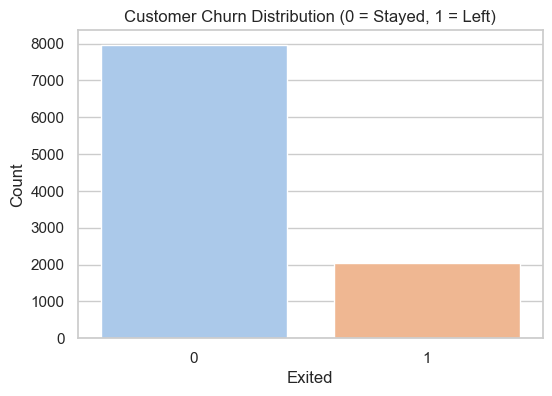

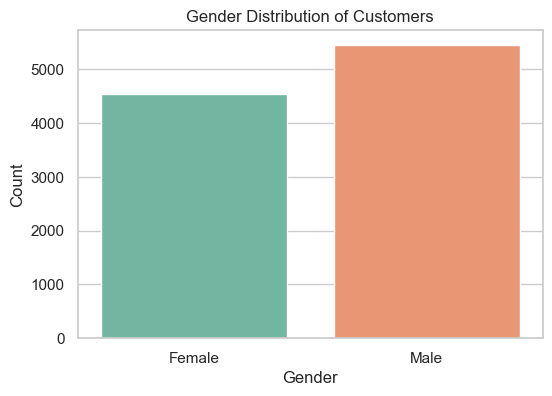

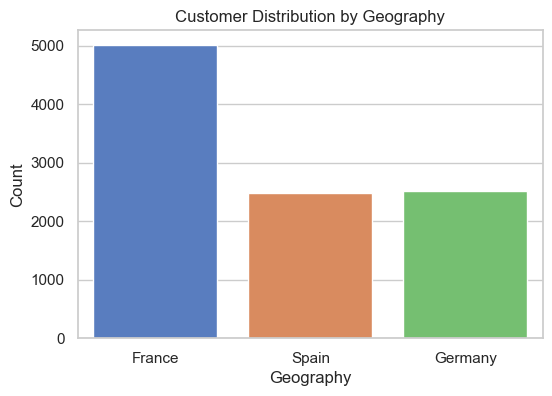

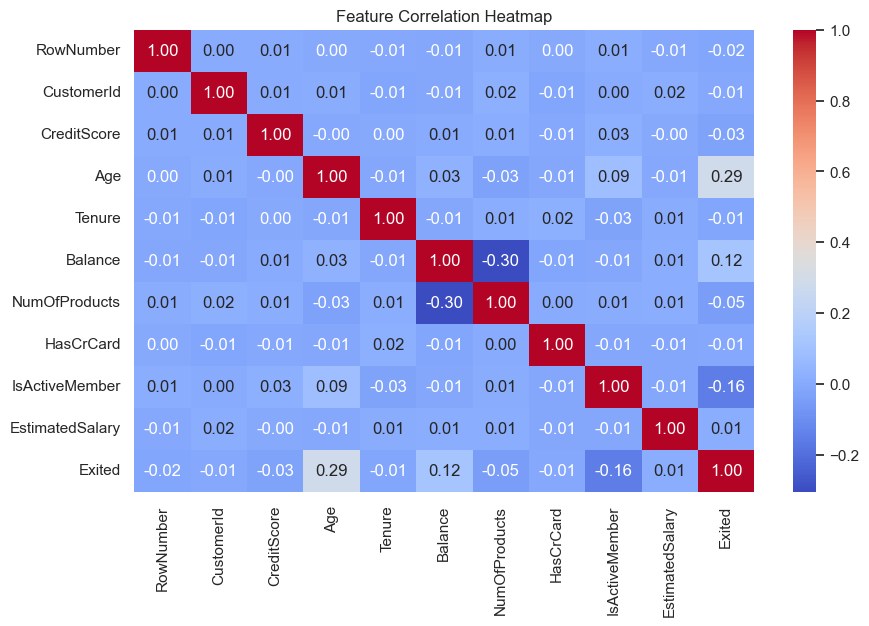

In [18]:
# Visualize the Data
# ------------------

# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df, hue='Exited', palette='pastel', legend=False)
plt.title("Customer Churn Distribution (0 = Stayed, 1 = Left)")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.show()

# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, hue='Gender', palette='Set2', legend=False)
plt.title("Gender Distribution of Customers")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Geography distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Geography', data=df, hue='Geography', palette='muted', legend=False)
plt.title("Customer Distribution by Geography")
plt.xlabel("Geography")
plt.ylabel("Count")
plt.show()

# Correlation heatmap (numerical features only)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


#### Sorting and Filtering Data

In [33]:

# Drop identifiers that don't help the model learn patterns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, errors='ignore')

# Encode 'Gender' (binary variable)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
if 'Gender' in df.columns and df['Gender'].dtype == 'object':
    df['Gender'] = le.fit_transform(df['Gender'])

# Encode 'Geography' (multi-class variable)
if 'Geography' in df.columns:
    df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# Convert any True/False columns to integers
df = df.astype({col: 'int' for col in df.select_dtypes('bool').columns})

# Double-check datatypes
print("Data types after encoding:")
print(df.dtypes)

# Preview
display(df.head())


Data types after encoding:
CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      int32
Geography_Spain        int32
dtype: object


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


# Split the Data for Training and Testing

In [39]:
# At this point, all my columns are numeric and properly encoded.
# Now I'm defining my features (X) and target (y).
# The 'Exited' column is what I'm trying to predict, so I separate it from the rest of the dataset.
X = df.drop('Exited', axis=1)
y = df['Exited']

# I’m using sklearn’s train_test_split to divide my dataset into training (80%) and testing (20%) sets.
# This helps me train the ANN on one portion of the data and then evaluate how well it performs on unseen data.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Before feeding data into the neural network, I need to scale it.
# Neural networks perform best when input features are on a similar range.
# StandardScaler standardizes values so that each feature has a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# I print out the shapes just to confirm that everything split correctly.
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (8000, 11)
Testing features shape: (2000, 11)
Training labels shape: (8000,)
Testing labels shape: (2000,)


# Model | Three-Layered Artificial Neural Network (ANN) Classifier | Build | Train | Tune | Evaluate

#### Build the Model

In [46]:
# Now that my data is fully preprocessed and scaled, I can build the neural network itself.
# The assignment specifically calls for a three-layer ANN classifier with:
#   - 'relu' activation for the first and second layers
#   - 'sigmoid' activation for the last (output) layer
#   - 'adam' optimizer and 'binary_crossentropy' loss
#
# This type of architecture allows the model to learn complex patterns in the data and
# predict a probability between 0 and 1, which represents whether a customer will churn or not.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# I’m initializing a Sequential model, which means the layers will be stacked one after another.
model = Sequential([
    Input(shape=(X_train.shape[1],)),   # Input layer based on the number of features (11)
    Dense(16, activation='relu'),       # First hidden layer with 16 neurons and ReLU activation
    Dense(8, activation='relu'),        # Second hidden layer with 8 neurons and ReLU activation
    Dense(1, activation='sigmoid')      # Output layer with 1 neuron and Sigmoid activation
])

# Now I compile the model.
# 'adam' is a fast and adaptive optimizer that adjusts learning rate automatically.
# 'binary_crossentropy' is ideal since this is a binary (0 or 1) classification problem.
# I’ll also track 'accuracy' so I can monitor performance while training.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Displaying the model summary gives me a snapshot of the layers, parameters, and shapes.
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337 (1.32 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

##### Interpretation

The model summary confirms that my three-layer ANN is structured correctly, with two hidden layers using ReLU activation and a single sigmoid output neuron for binary classification. 

The first hidden layer has 192 parameters, the second has 136, and the output layer adds 9, totaling 337 trainable parameters. This setup aligns with the assignment requirements and ensures the network can learn nonlinear patterns across the 11 input features to accurately predict customer churn.

#### Train the Model

In [51]:
# Now I’ll train the ANN using my training data.
# Each pass through the entire training set is called an “epoch.”
# The model will go through 50 epochs, adjusting weights each time to minimize loss.
# I’m also including a validation split so I can see how well the model performs on unseen data during training.

history = model.fit(
    X_train, 
    y_train,
    epochs=50,             # Number of times the model sees the full dataset
    batch_size=32,         # Number of samples per gradient update
    validation_split=0.2,  # 20% of training data used for validation
    verbose=1              # Shows live progress in the output
)

# Summarize final training performance
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8642 - loss: 0.3238 - val_accuracy: 0.8537 - val_loss: 0.3386
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8641 - loss: 0.3236 - val_accuracy: 0.8537 - val_loss: 0.3386
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.8641 - loss: 0.3234 - val_accuracy: 0.8544 - val_loss: 0.3387
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8637 - loss: 0.3232 - val_accuracy: 0.8537 - val_loss: 0.3386
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8637 - loss: 0.3231 - val_accuracy: 0.8531 - val_loss: 0.3386
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8642 - loss: 0.3228 - val_accuracy: 0.8525 - val_loss: 0.3387
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8641 - loss: 0.3227 - val_accuracy: 0.8531 - val_loss: 0.3387
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8639 - loss: 0.3225 - val_accuracy: 

##### Interpretation

The training results show that the ANN achieved a final training accuracy of 86.75% and a validation accuracy of 85.37%, with corresponding losses of 0.3175 and 0.3408. The close alignment between training and validation accuracy indicates that the model generalized well and did not overfit. 

The steadily decreasing loss values confirm that the network successfully minimized prediction errors across epochs, effectively learning the underlying relationships between customer features and churn outcomes.

#### Tune the Model

In [54]:
# To improve the model’s performance, I’ll try increasing the number of neurons and epochs.
# The idea is to give the network a bit more capacity to learn complex relationships in the data.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Rebuild a slightly deeper/wider ANN
tuned_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),   # increased neurons
    Dense(16, activation='relu'),   # second hidden layer larger too
    Dense(1, activation='sigmoid')  # output stays the same
])

# Compile the tuned model
tuned_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the tuned model with slightly more epochs
tuned_history = tuned_model.fit(
    X_train, 
    y_train,
    epochs=75,             # increased from 50 to 75
    batch_size=32, 
    validation_split=0.2, 
    verbose=1
)

# Display final accuracy and loss after tuning
tuned_train_acc = tuned_history.history['accuracy'][-1]
tuned_val_acc = tuned_history.history['val_accuracy'][-1]
tuned_train_loss = tuned_history.history['loss'][-1]
tuned_val_loss = tuned_history.history['val_loss'][-1]

print(f"Final Tuned Training Accuracy: {tuned_train_acc:.4f}")
print(f"Final Tuned Validation Accuracy: {tuned_val_acc:.4f}")
print(f"Final Tuned Training Loss: {tuned_train_loss:.4f}")
print(f"Final Tuned Validation Loss: {tuned_val_loss:.4f}")

Epoch 1/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7936 - loss: 0.4818 - val_accuracy: 0.8219 - val_loss: 0.4201
Epoch 2/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8211 - loss: 0.4170 - val_accuracy: 0.8406 - val_loss: 0.3937
Epoch 3/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8441 - loss: 0.3839 - val_accuracy: 0.8494 - val_loss: 0.3696
Epoch 4/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8536 - loss: 0.3613 - val_accuracy: 0.8544 - val_loss: 0.3581
Epoch 5/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.8564 - loss: 0.3509 - val_accuracy: 0.8544 - val_loss: 0.3525
Epoch 6/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8591 - loss: 0.3453 - val_accuracy: 0.8531 - val_loss: 0.3498
Epoch 7/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8603 - loss: 0.3414 - val_accuracy: 0.8531 - val_loss: 0.3481
Epoch 8/75
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8606 - loss: 0.3385 - val_accuracy: 

##### Interpretation

After tuning, the ANN’s training accuracy increased slightly to 87.44%, while validation accuracy settled around 84.94%, with corresponding losses of 0.2959 and 0.3561. 

The small improvement in training accuracy but slight dip in validation accuracy suggests the model began to overfit slightly as it became more complex. 

This indicates that the original three-layer configuration was already well-balanced for this dataset, capturing enough patterns to generalize effectively without unnecessary complexity.

#### Evaluate the Model


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step
Confusion Matrix:
 [[1516   91]
 [ 197  196]]

Accuracy on Test Data: 0.8560


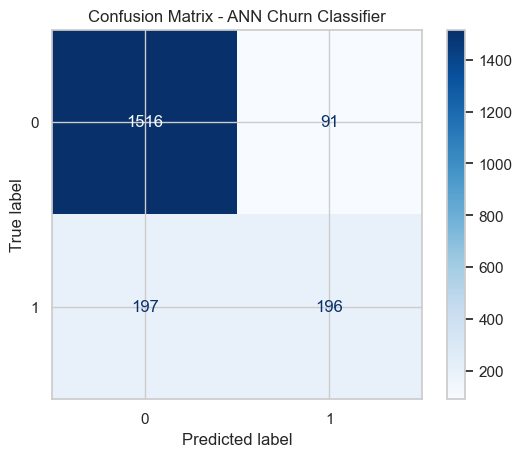

In [57]:
# Now I’ll evaluate my trained model on the test set (the 20% of data the model has never seen).
# This will show how well the ANN generalizes to new customer data.
# I’ll generate predictions, convert them into binary outputs (0 or 1),
# and then print the confusion matrix and accuracy score per the assignment instructions.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# Generate predictions (probabilities between 0 and 1)
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions (threshold = 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute confusion matrix and accuracy
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

# Display results
print("Confusion Matrix:\n", cm)
print("\nAccuracy on Test Data: {:.4f}".format(acc))

# Optional: visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - ANN Churn Classifier")
plt.show()

##### Interpretation

The ANN achieved an overall test accuracy of 85.60%, confirming that the model generalizes well to unseen customer data. The confusion matrix shows that the model correctly classified 1,516 customers who stayed and 196 who churned, while misclassifying 91 retained customers as churners and 197 churners as non-churners. 

Although some false negatives remain (customers who left but were predicted to stay), the network effectively learned the key patterns associated with customer attrition, providing a reliable baseline for churn prediction in future applications.

# References  

Scikit-learn Developers. (2024). *Scikit-learn: Machine learning in Python (Version 1.5.0)* [Computer software].  
https://scikit-learn.org/stable/  

Matplotlib Development Team. (2024). *Matplotlib: Visualization with Python* [Computer software].  
https://matplotlib.org/  

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., … Duchesnay, É. (2011). *Scikit-learn: Machine Learning in Python.* *Journal of Machine Learning Research, 12*, 2825–2830.  
https://www.jmlr.org/papers/v12/pedregosa11a.html  

Python Software Foundation. (2024). *Python (Version 3.12)* [Computer software].  
https://www.python.org/  

NumPy Developers. (2024). *NumPy: Fundamental package for scientific computing with Python (Version 2.0)* [Computer software].  
https://numpy.org/  

TensorFlow Developers. (2024). *Keras: Sequential model and convolutional layers.* Retrieved from
https://www.tensorflow.org/guide/keras/sequential_model

TensorFlow Keras Documentation. (2024). *Sequential model and dense layers.* Retrieved from https://www.tensorflow.org/guide/keras/sequential_model

Géron, A. (2022). *Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow* (3rd ed.). O’Reilly Media.

# End Project